In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.DataFrame(pd.read_csv('/content/train.csv'))
df = df.drop(['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure'],axis=1)
# print(df.describe())
# print(df.info())

In [ ]:
SalesPriceCorr = df.corrwith(df['SalePrice'])
print(SalesPriceCorr)
print(type(SalesPriceCorr))
SalesPriceCorr.to_csv('/content/corr.csv',index=False)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

<ipython-input-17-beb059cca01f>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SalesPriceCorr = df.corrwith(df['SalePrice'])


<ipython-input-11-cbd9b9e3d8e7>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in df.iteritems():


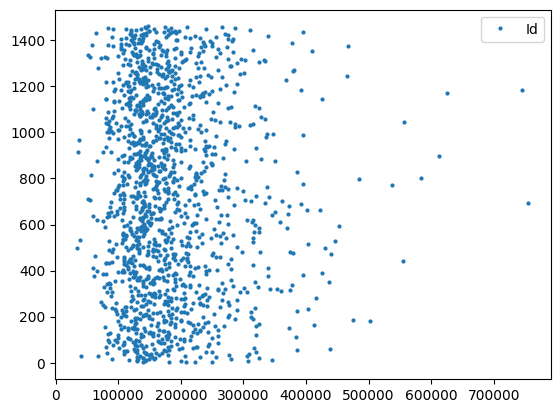

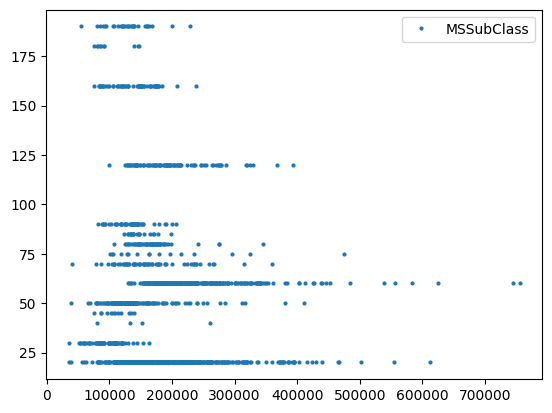

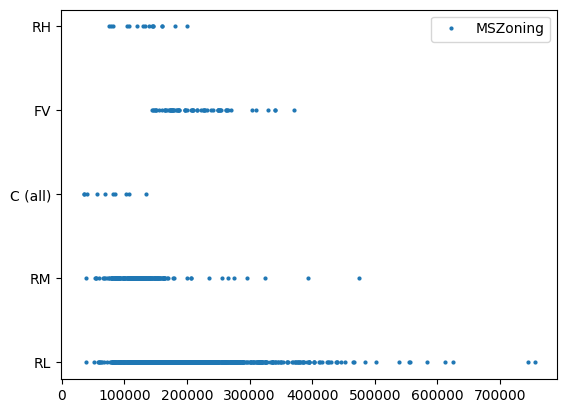

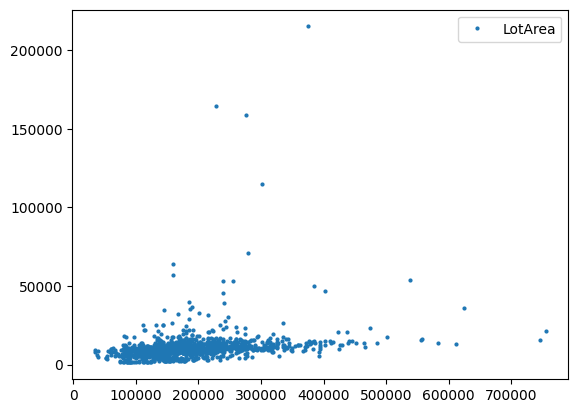

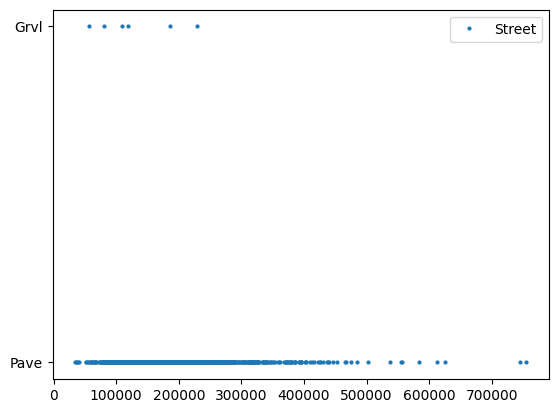

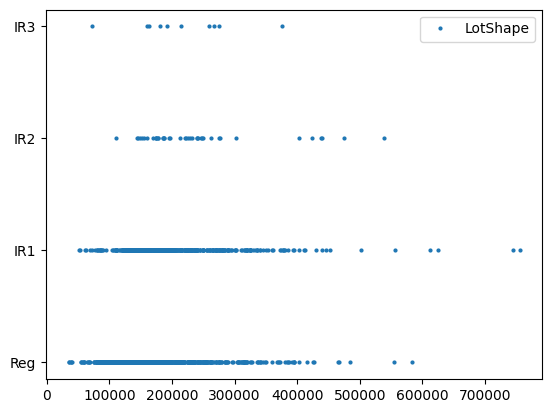

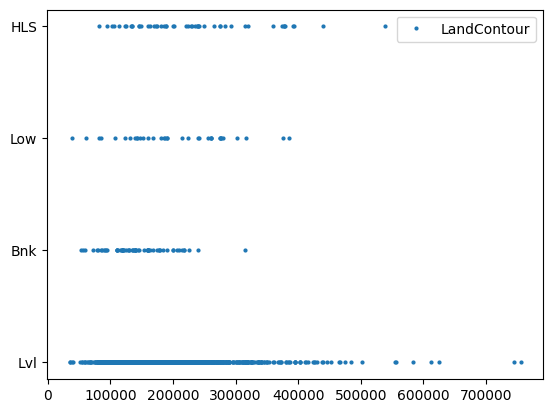

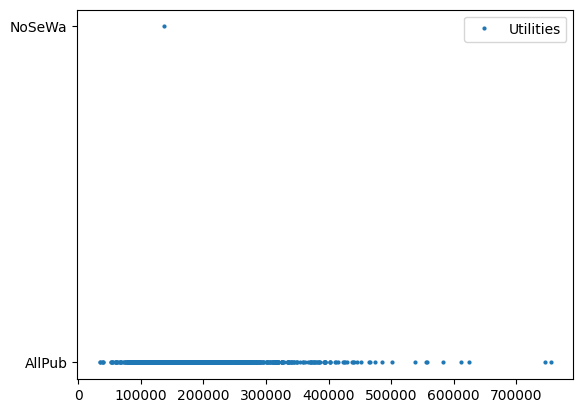

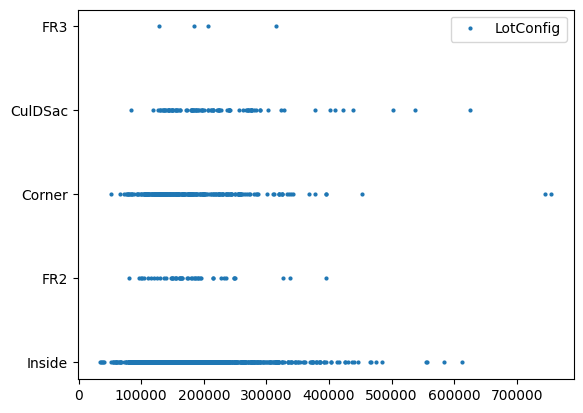

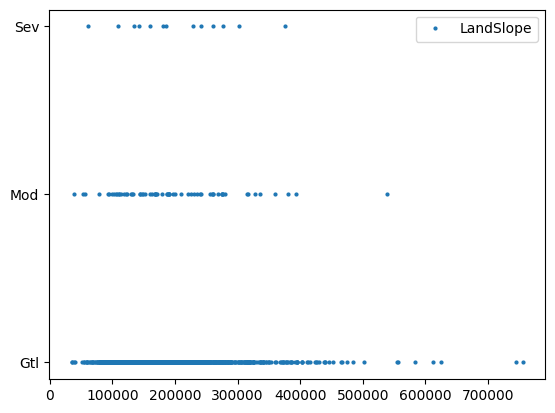

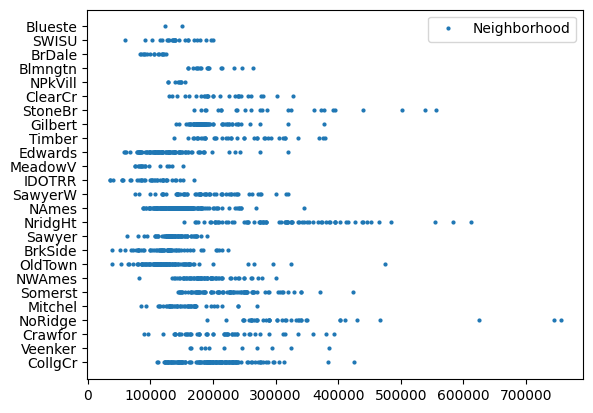

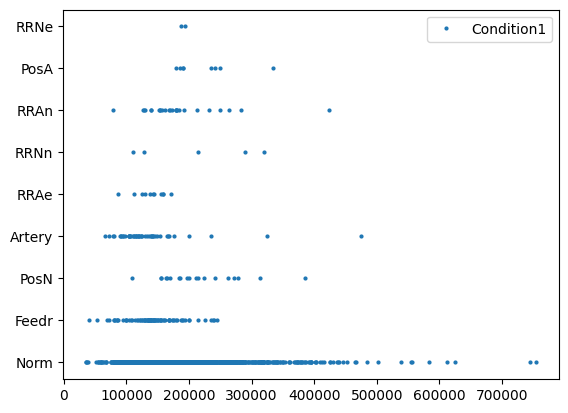

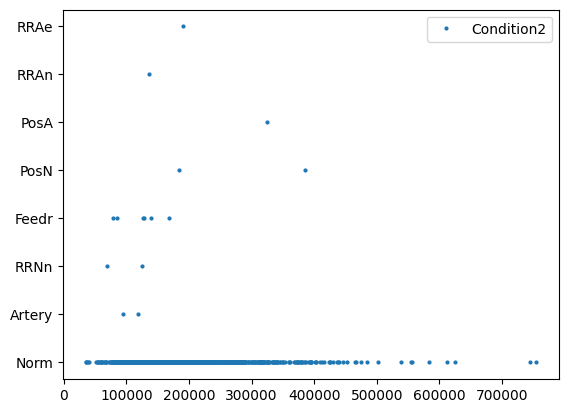

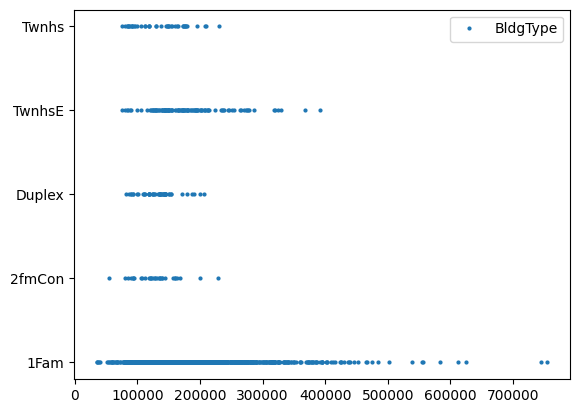

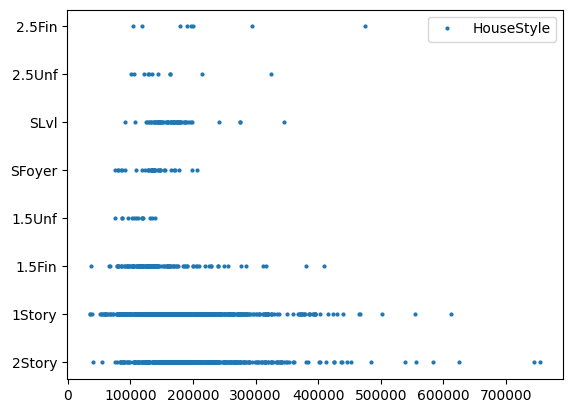

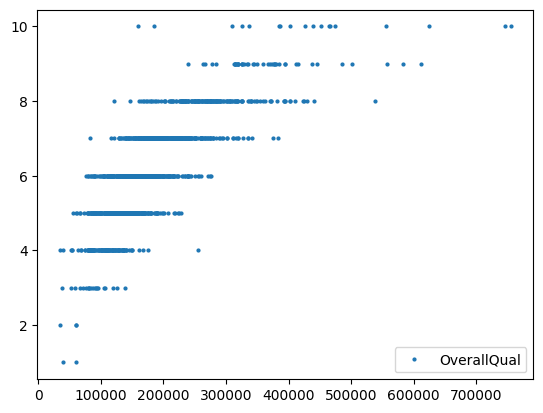

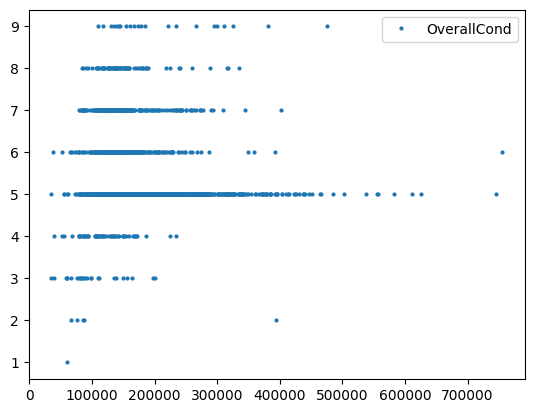

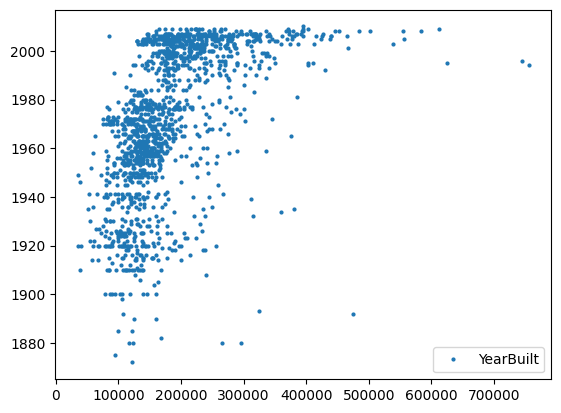

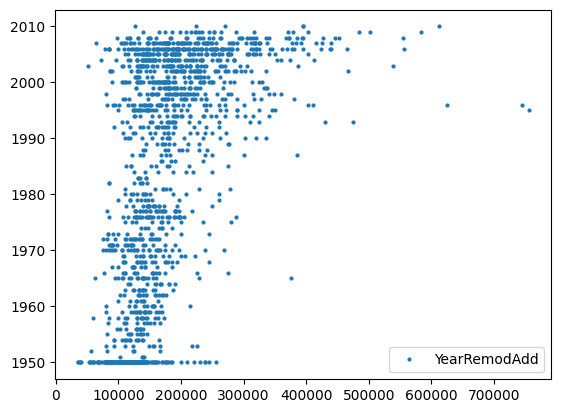

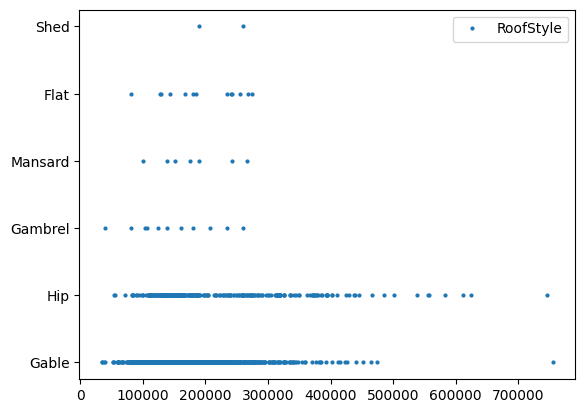

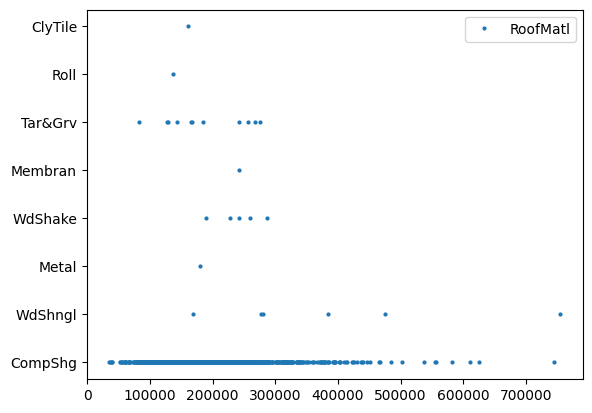

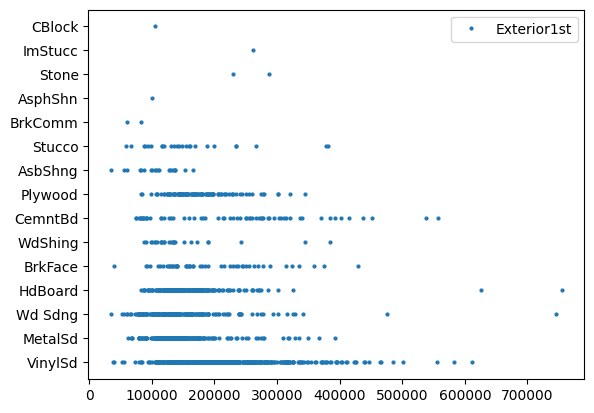

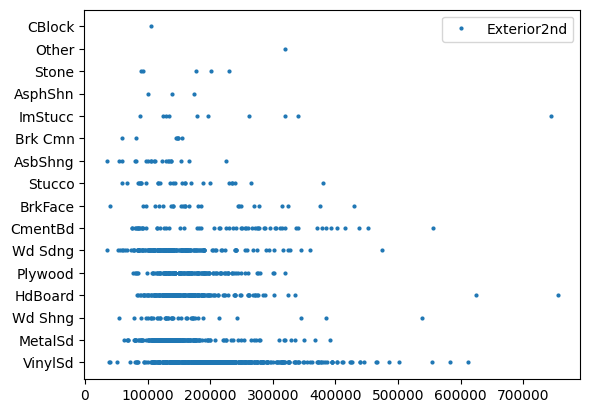

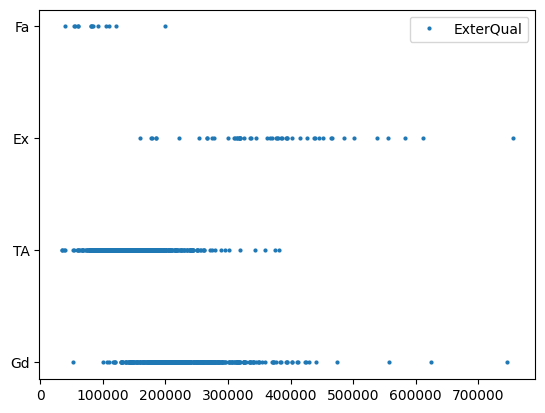

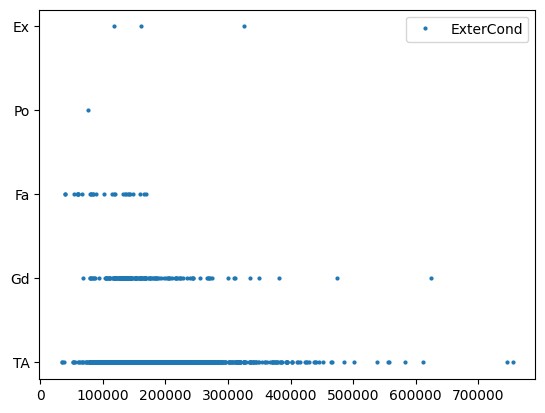

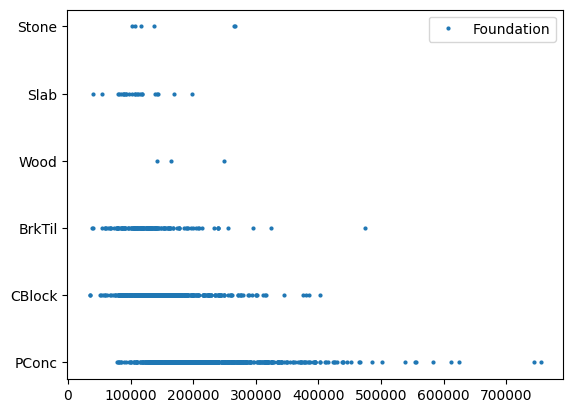

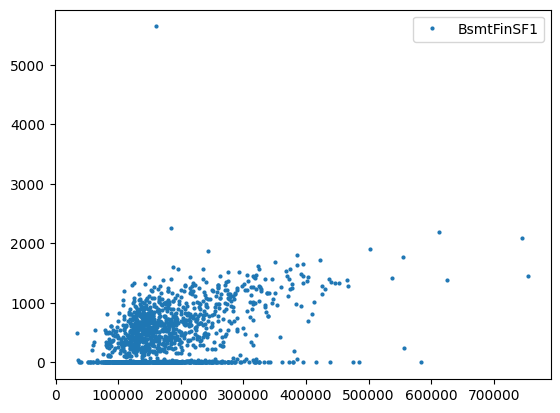

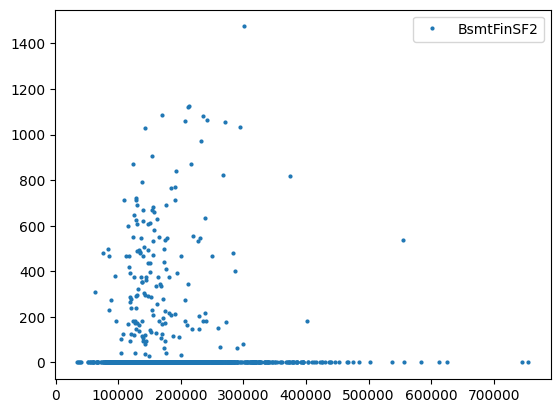

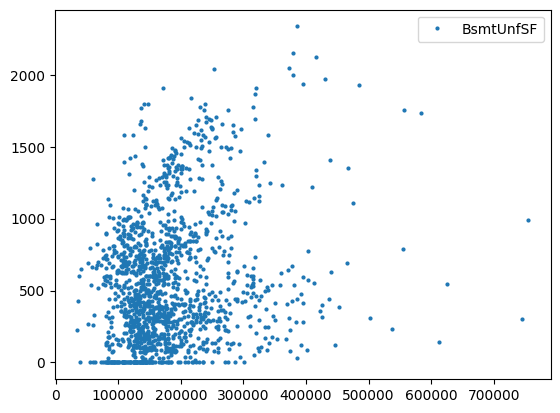

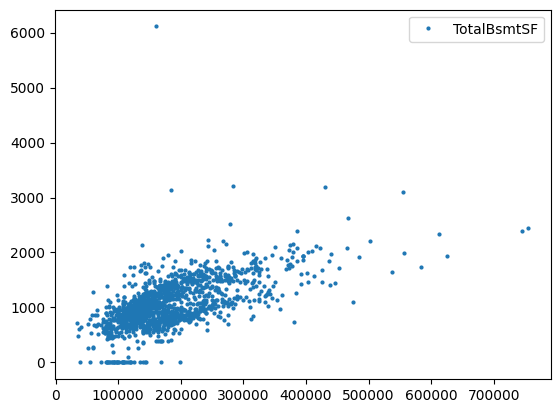

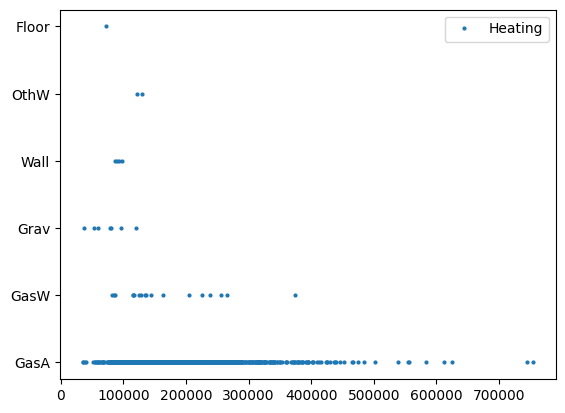

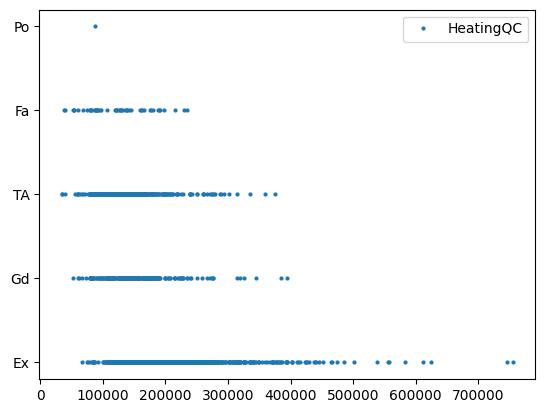

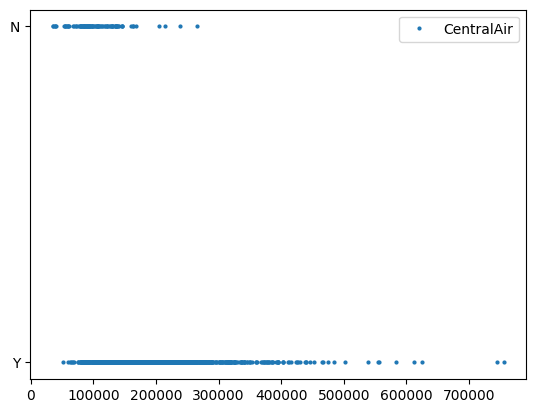

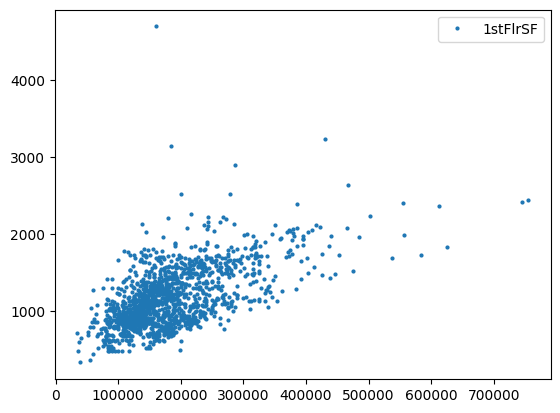

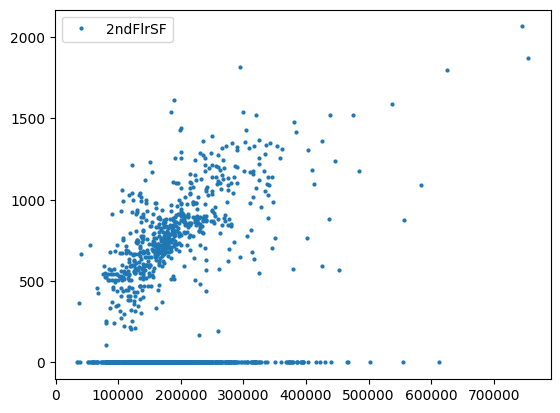

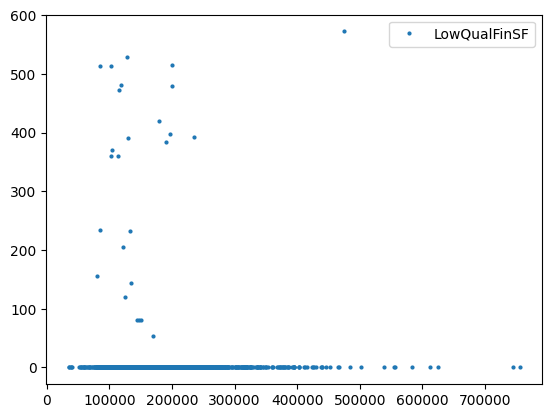

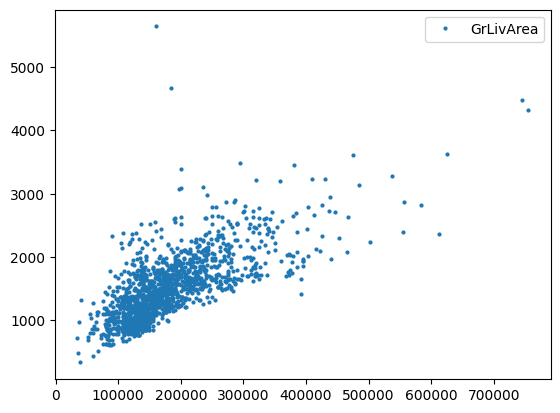

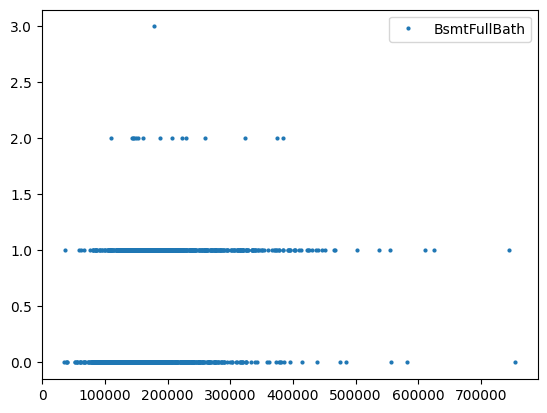

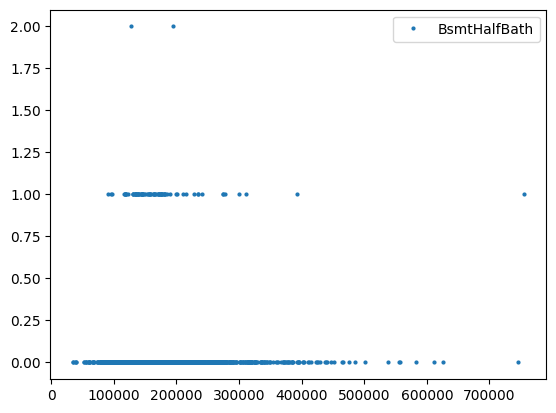

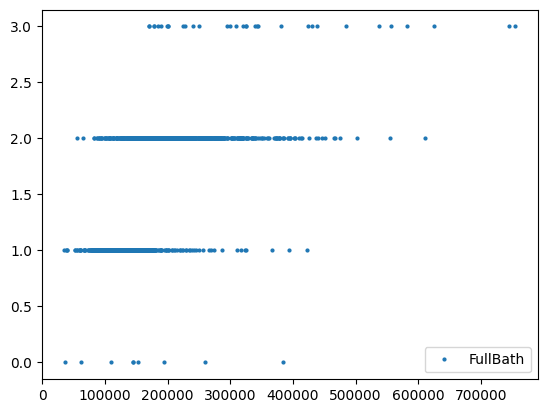

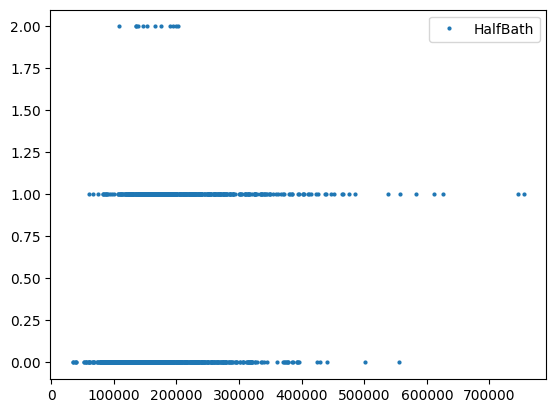

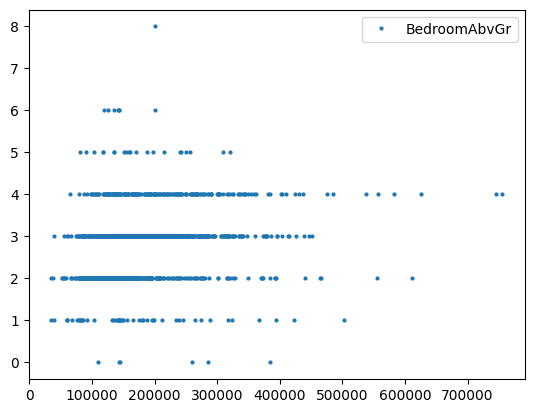

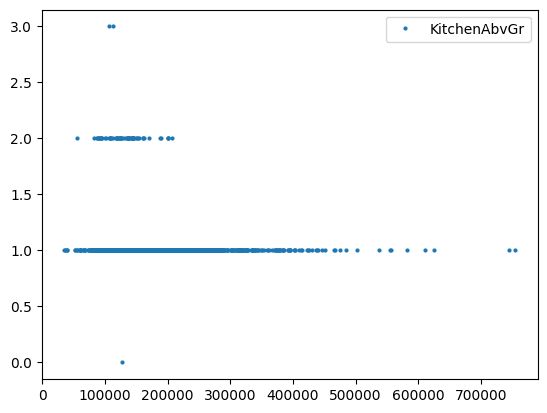

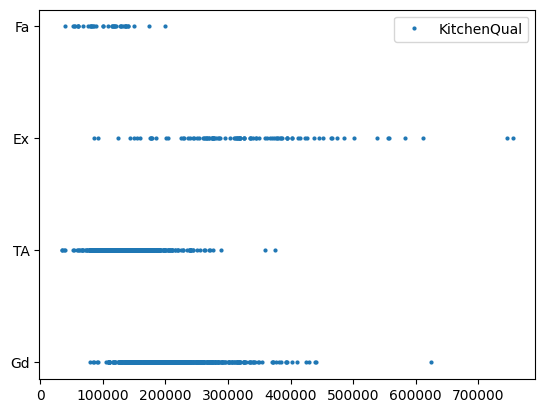

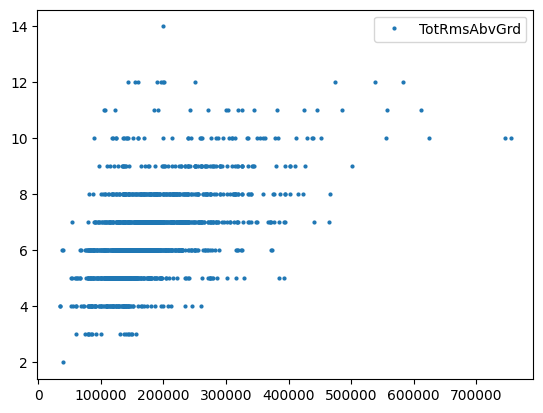

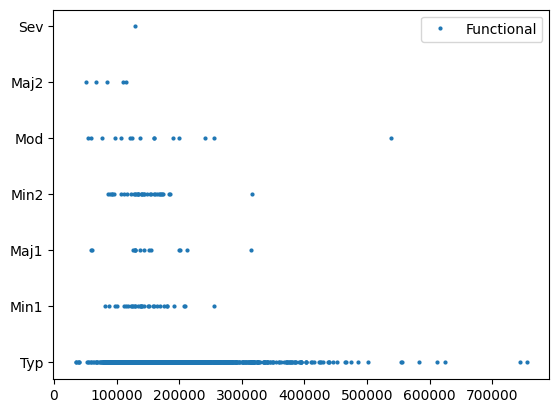

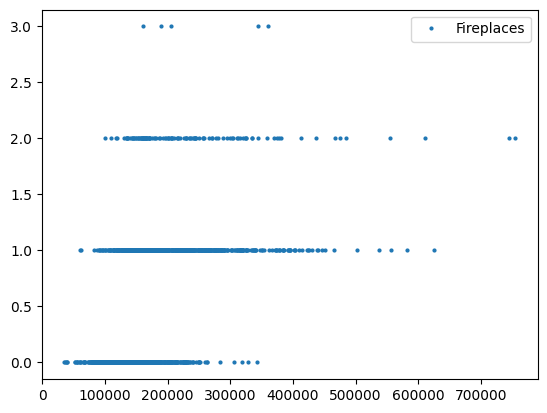

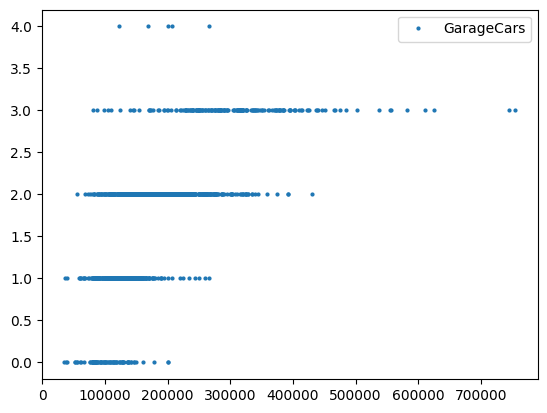

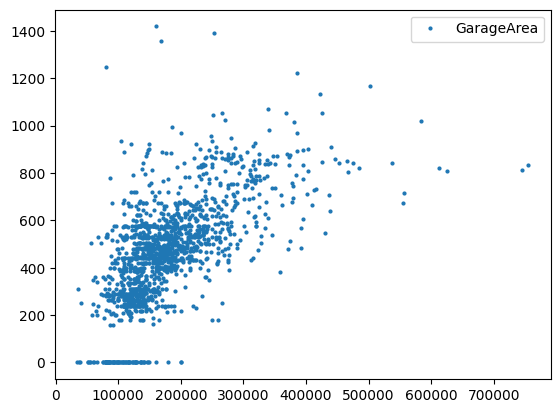

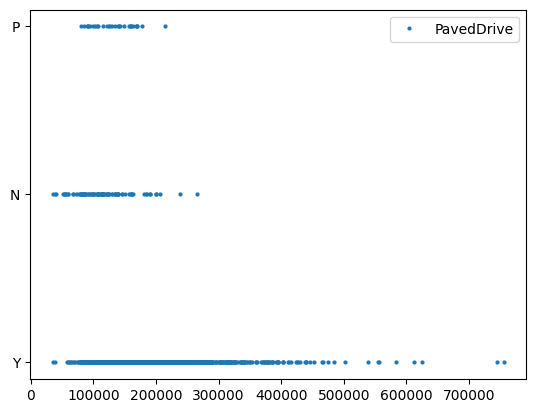

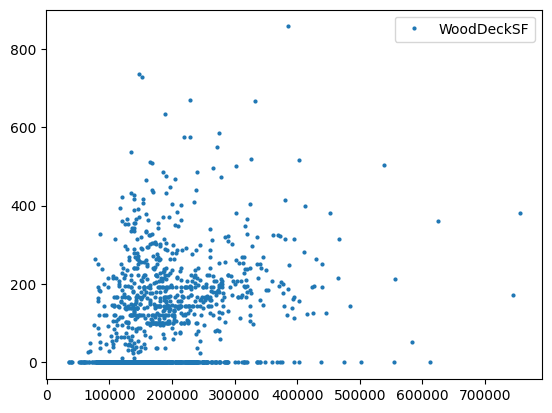

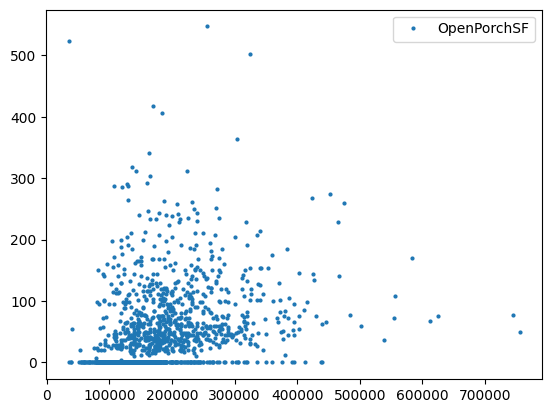

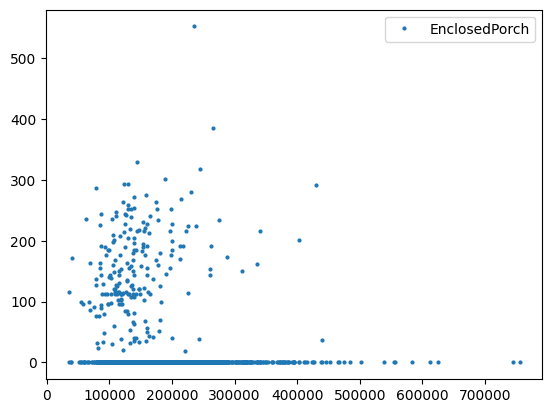

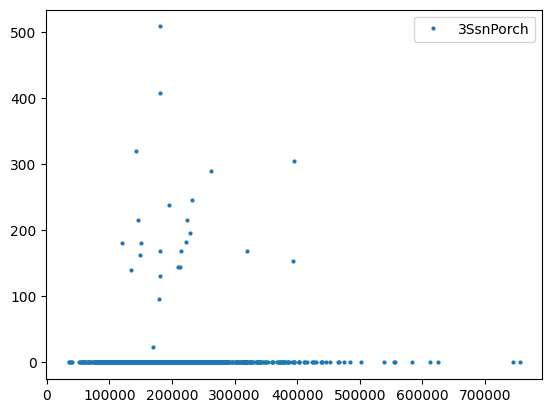

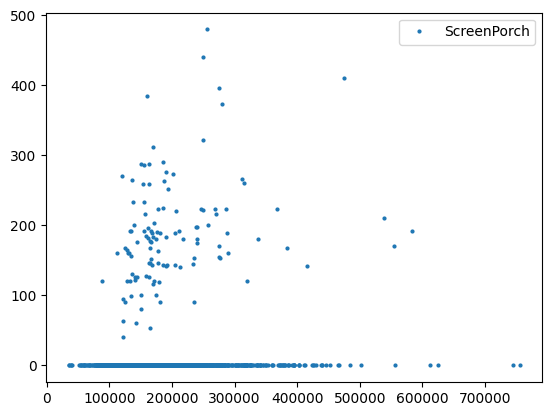

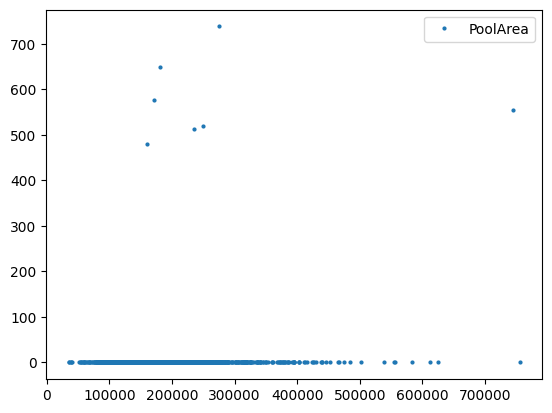

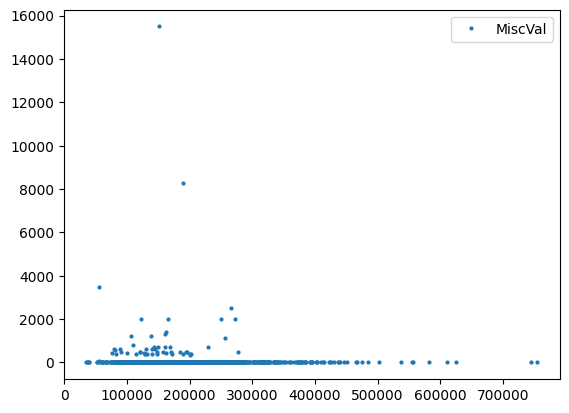

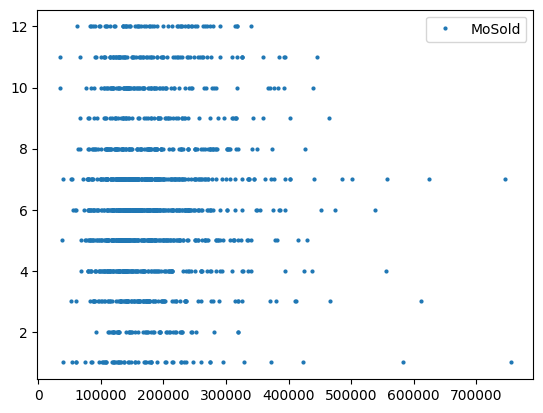

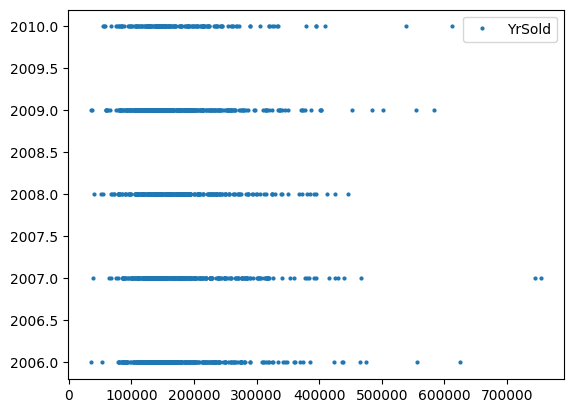

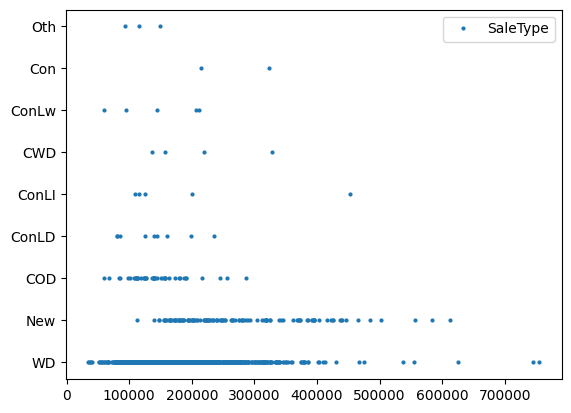

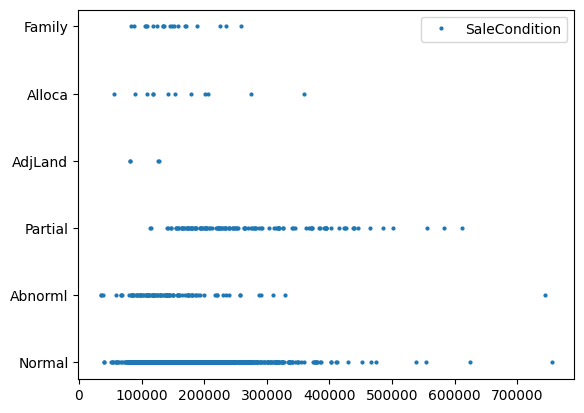

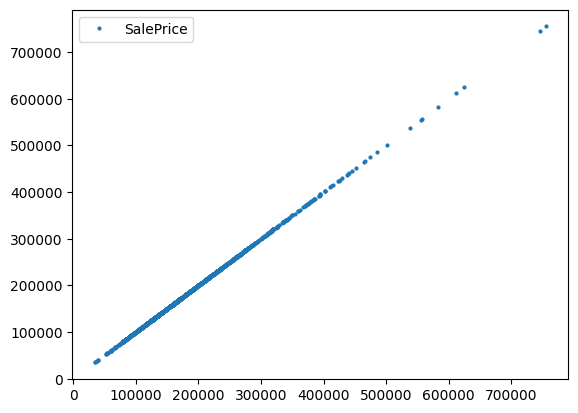

In [ ]:
for name,data in df.iteritems():
  if(data.isna().sum()>0):
    continue
  plt.plot(df['SalePrice'],data,'o',label=name,markersize=2)
  plt.legend()
  plt.show()

<ipython-input-49-a5495523a3a1>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in newdf.iteritems():


Id


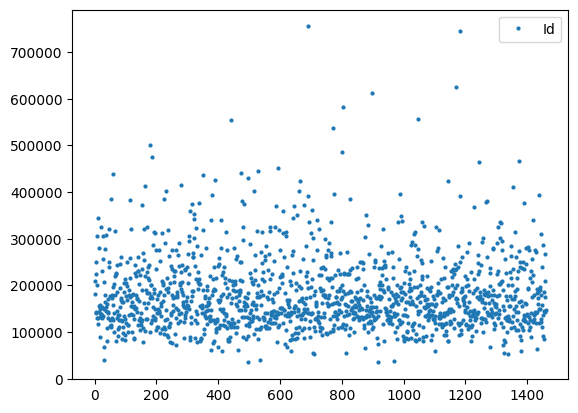

MSSubClass


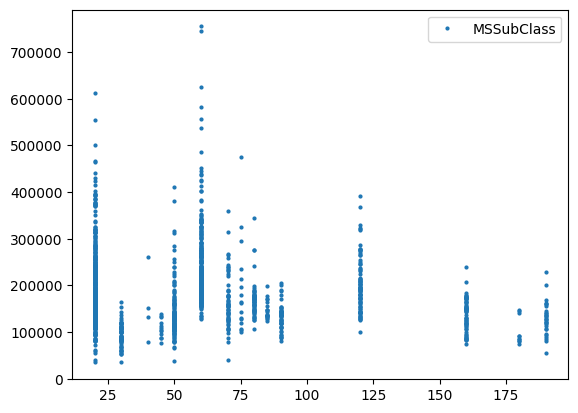

MSZoning


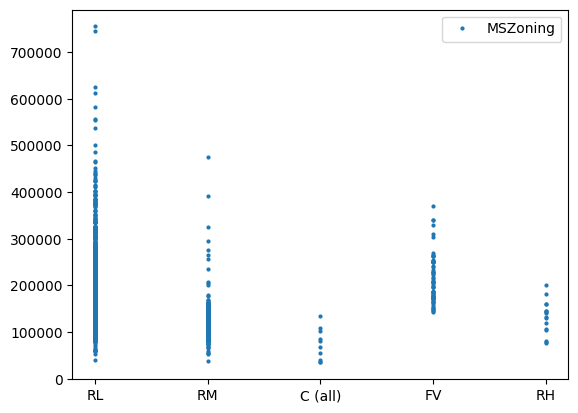

LotFrontage


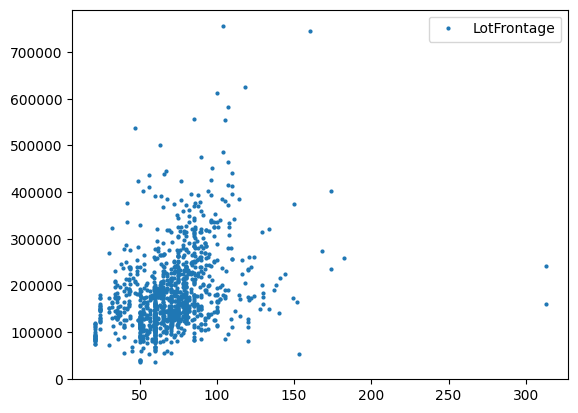

LotArea


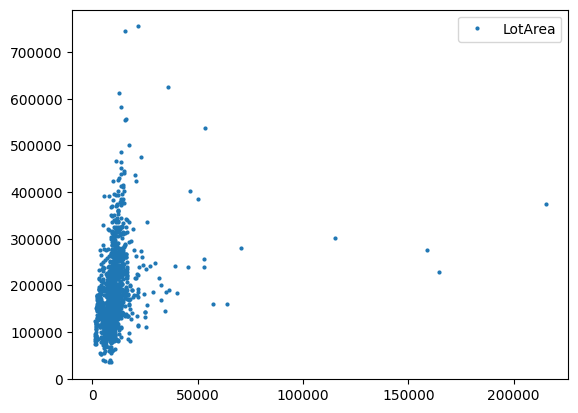

Street


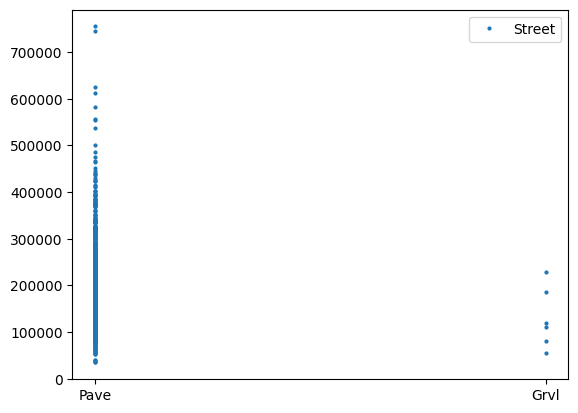

LotShape


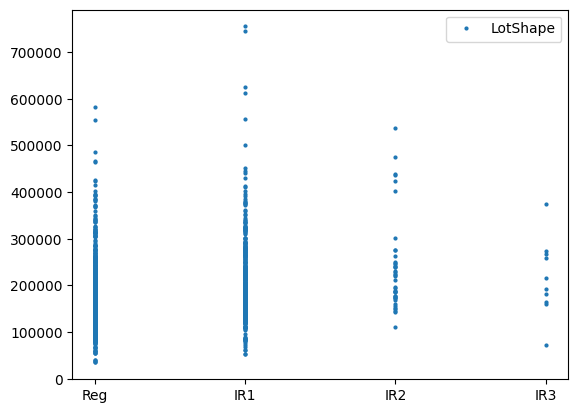

LandContour


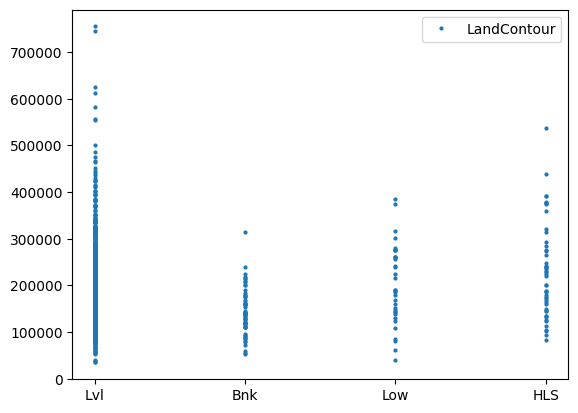

Utilities


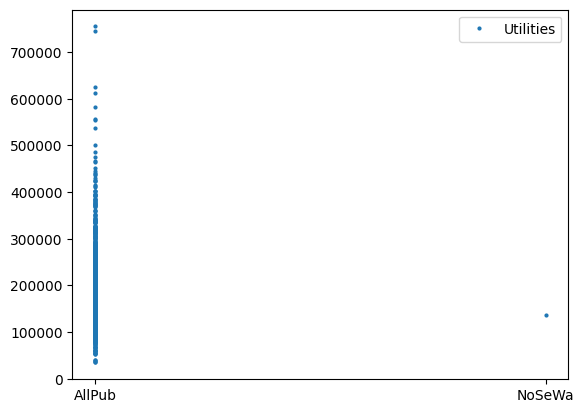

LotConfig


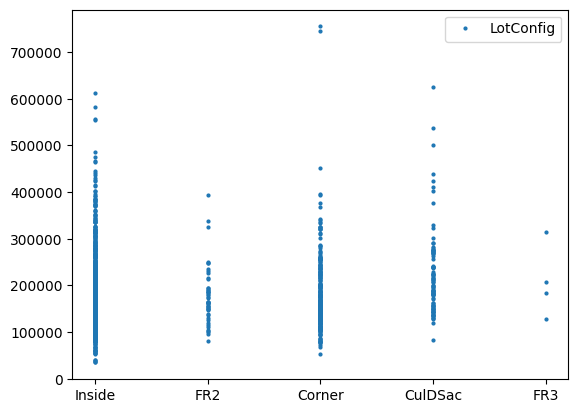

LandSlope


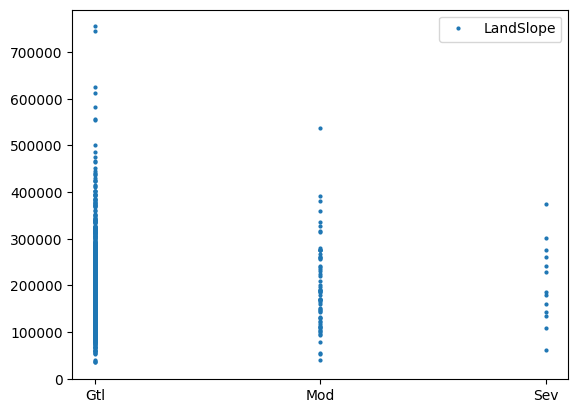

Neighborhood


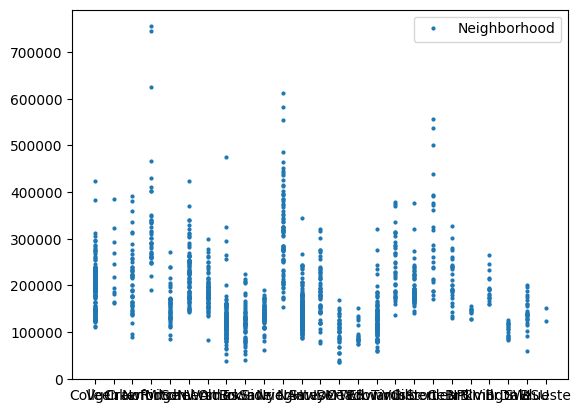

Condition1


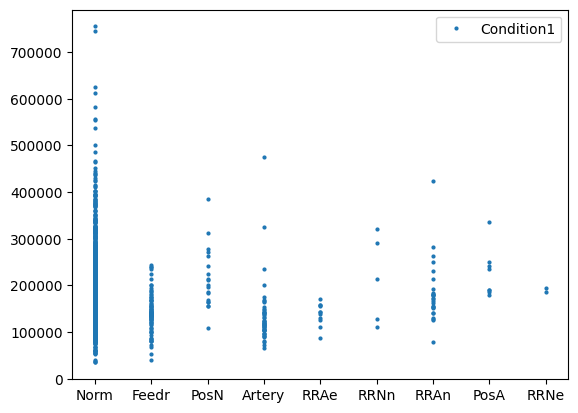

Condition2


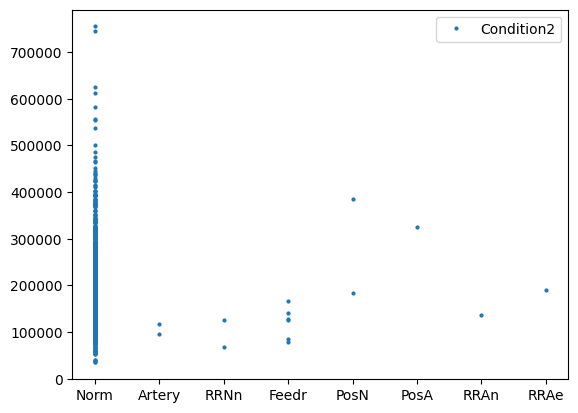

BldgType


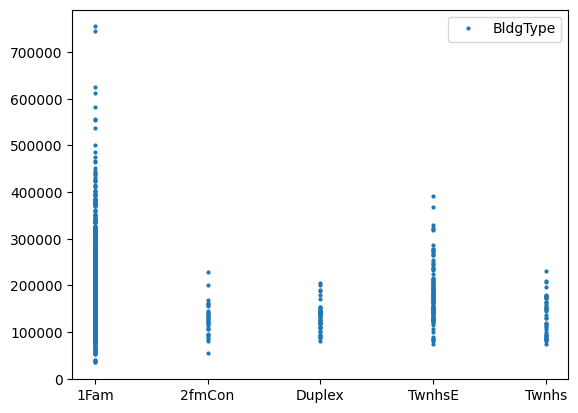

HouseStyle


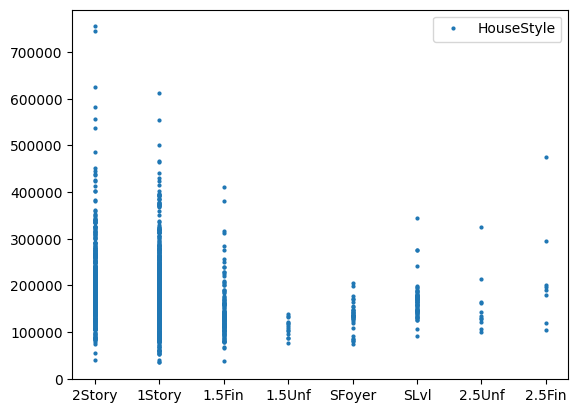

OverallQual


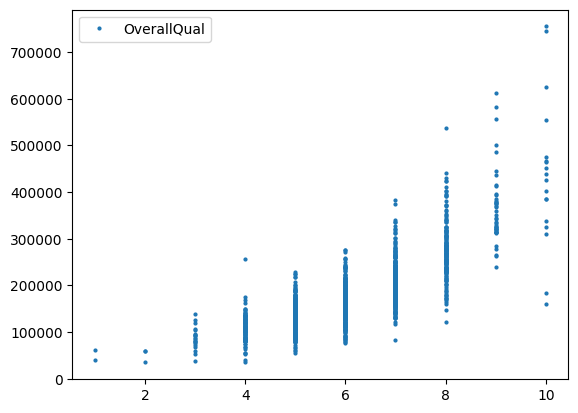

OverallCond


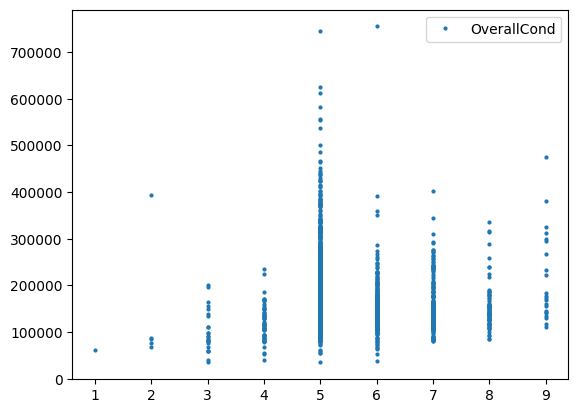

YearBuilt


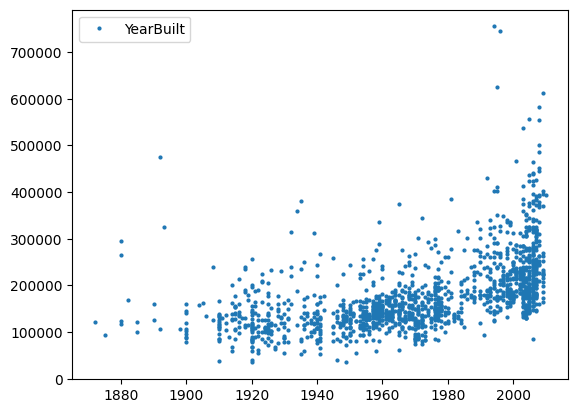

YearRemodAdd


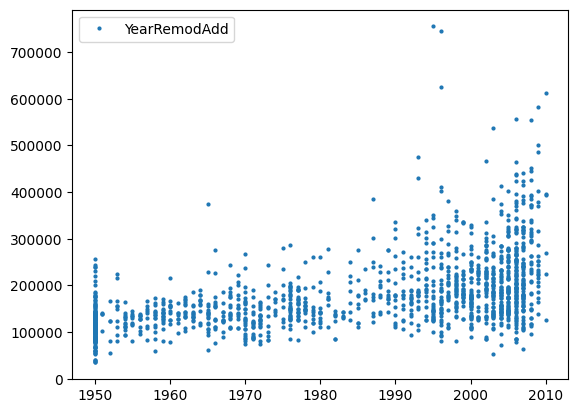

RoofStyle


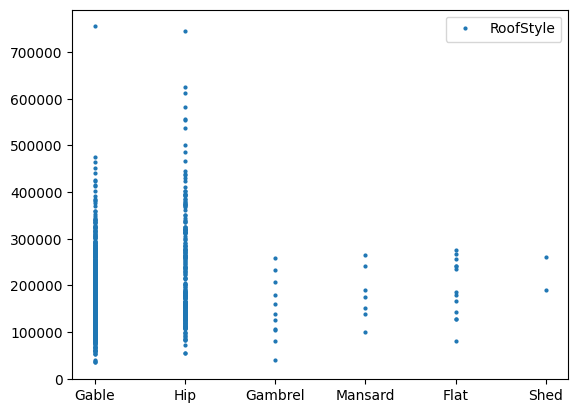

RoofMatl


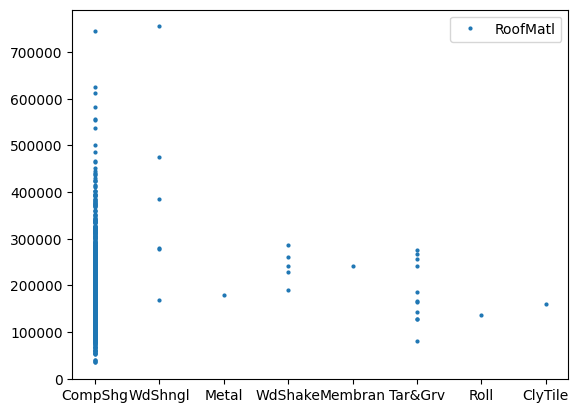

Exterior1st


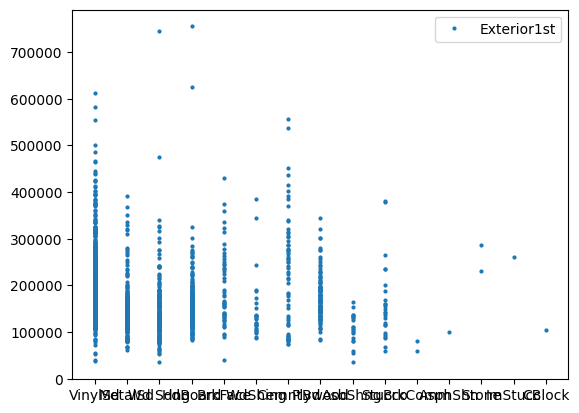

Exterior2nd


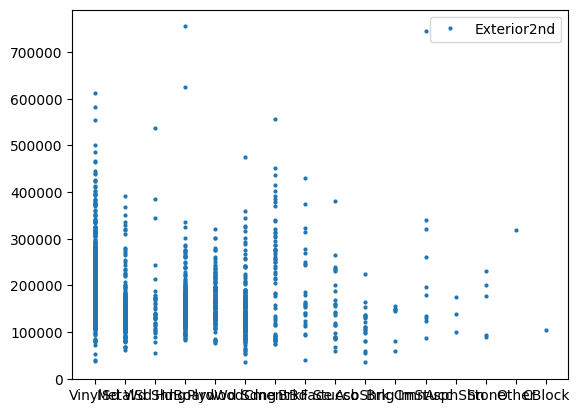

MasVnrArea


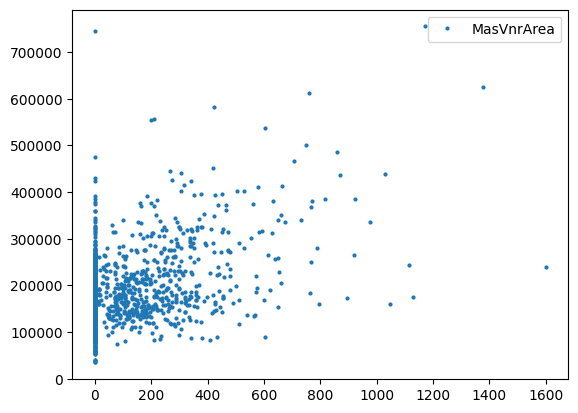

ExterQual


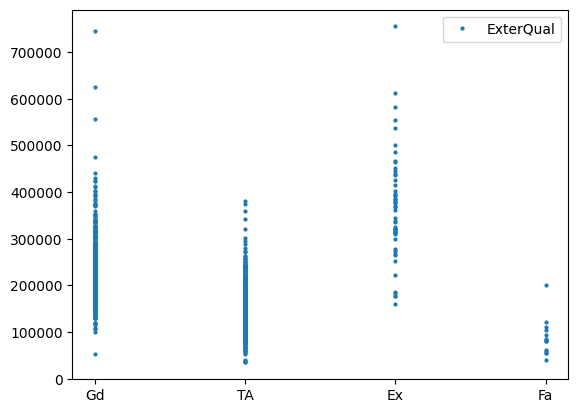

ExterCond


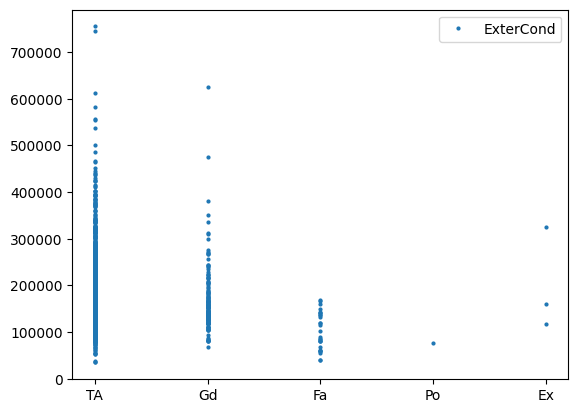

Foundation


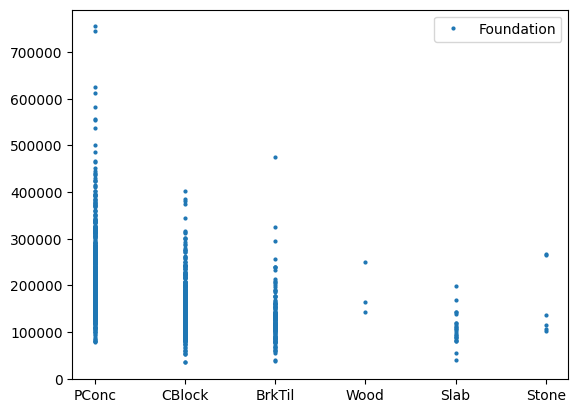

BsmtFinType1


TypeError: ignored

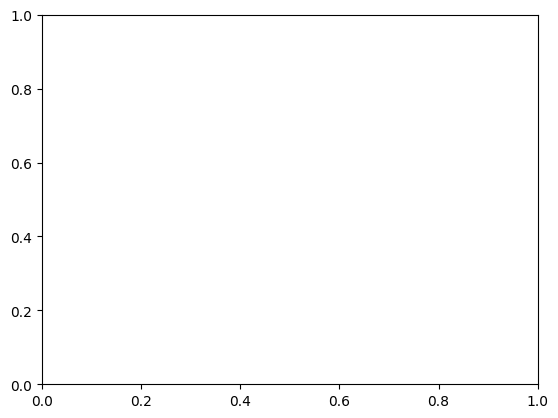

In [ ]:
newdf = df[:]
for name,data in newdf.iteritems():
  print(name)
  plt.plot(data,newdf['SalePrice'],'o',label=name,markersize=2)
  plt.legend()
  plt.show()

In [ ]:
for name, data in df.iteritems():
    if name != 'SalePrice':  # Skip the 'SalePrice' column
        print(name)
        formula = f'SalePrice ~ {name}'  # Correct the formula string
        lm = smf.ols(formula=formula, data=df).fit()  # Fit the model
        print(lm.params)
        print(lm.summary())

<ipython-input-46-59fa3db09035>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, data in df.iteritems():


Id
Intercept    183937.935142
Id               -4.129691
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7007
Date:                Mon, 16 Oct 2023   Prob (F-statistic):              0.403
Time:                        06:57:12   Log-Likelihood:                -18544.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

SyntaxError: ignored

In [ ]:
nonulldf = df.dropna()
print(nonulldf.describe())
print(nonulldf.info())

        Id  MSSubClass  LotFrontage  LotArea  ...  MiscVal  MoSold  YrSold  SalePrice
count  0.0         0.0          0.0      0.0  ...      0.0     0.0     0.0        0.0
mean   NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN
std    NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN
min    NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN
25%    NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN
50%    NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN
75%    NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN
max    NaN         NaN          NaN      NaN  ...      NaN     NaN     NaN        NaN

[8 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 

In [ ]:
formula = "SalePrice ~ YearBuilt + TotRmsAbvGrd + FullBath + TotalBsmtSF + GarageArea + GarageCars + GrLivArea + OverallQual"  # Correct the formula string
lm = smf.ols(formula=formula, data=df).fit()  # Fit the model
print(lm.params)
print(lm.summary())

Intercept      -734238.045465
YearBuilt          334.875817
TotRmsAbvGrd       -77.414739
FullBath         -5042.040872
TotalBsmtSF         28.231457
GarageArea          16.457956
GarageCars       10743.316526
GrLivArea           53.754989
OverallQual      20549.763065
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     604.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:23:19   Log-Likelihood:                -17474.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1451   BIC:                         3.501e+04
Df Model:                           8                                         
Cova

In [ ]:
count=0
for name,data in df.iteritems():
  count+=  1 if (df[name].insa().sum()>0) else 0

print(count)

<ipython-input-27-99df81d1821c>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in df.iteritems():


AttributeError: ignored

In [ ]:
print(df['YearBuilt'].isna().sum())
print(df['TotRmsAbvGrd'].isna().sum())
print(df['FullBath'].isna().sum())
print(df['TotalBsmtSF'].isna().sum())
print(df['GarageArea'].isna().sum())
print(df['GarageCars'].isna().sum())
print(df['GrLivArea'].isna().sum())
print(df['OverallQual'].isna().sum())

0
0
0
0
0
0
0
0
